In [ ]:
#import the basic library function which you play 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv('Fraud_check.csv')#read the file for the process
data

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,TaxableIncome
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340
596,YES,Divorced,55369,2,YES,69967
597,NO,Divorced,154058,0,YES,47334
598,YES,Married,180083,17,NO,98592


In [5]:
data.info() #gives the basic information about the data type ,nulLvalues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    int32 
 1   MaritalStatus   600 non-null    int32 
 2   CityPopulation  600 non-null    int64 
 3   WorkExperience  600 non-null    int64 
 4   Urban           600 non-null    int32 
 5   TaxableIncome   600 non-null    int64 
 6   Income          600 non-null    object
dtypes: int32(3), int64(3), object(1)
memory usage: 25.9+ KB


In [13]:
data.loc[data["TaxableIncome"]>=30000,"Income"]="Good"##here iam assuming that the income >30000 as good and other as the risky which given in the data type
data.loc[data["TaxableIncome"]<=30000,"Income"]="Risky"
data

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,TaxableIncome,Income
0,NO,Single,50047,10,YES,68833,Good
1,YES,Divorced,134075,18,YES,33700,Good
2,NO,Married,160205,30,YES,36925,Good
3,YES,Single,193264,15,YES,50190,Good
4,NO,Married,27533,28,NO,81002,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340,Good
596,YES,Divorced,55369,2,YES,69967,Good
597,NO,Divorced,154058,0,YES,47334,Good
598,YES,Married,180083,17,NO,98592,Good


In [4]:
label=preprocessing.LabelEncoder()                  ## changing the category value into the numeric using label encoder
data['Undergrad']=label.fit_transform(data.Undergrad)
data['MaritalStatus']=label.fit_transform(data['MaritalStatus'])
data['Urban']=label.fit_transform(data.Urban)
data

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,TaxableIncome,Income
0,0,2,50047,10,1,68833,Good
1,1,0,134075,18,1,33700,Good
2,0,1,160205,30,1,36925,Good
3,1,2,193264,15,1,50190,Good
4,0,1,27533,28,0,81002,Good
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,Good
596,1,0,55369,2,1,69967,Good
597,0,0,154058,0,1,47334,Good
598,1,1,180083,17,0,98592,Good


In [6]:
data.isna().sum()

Undergrad         0
MaritalStatus     0
CityPopulation    0
WorkExperience    0
Urban             0
TaxableIncome     0
Income            0
dtype: int64

In [7]:
data.nunique()

Undergrad           2
MaritalStatus       3
CityPopulation    598
WorkExperience     31
Urban               2
TaxableIncome     599
Income              2
dtype: int64

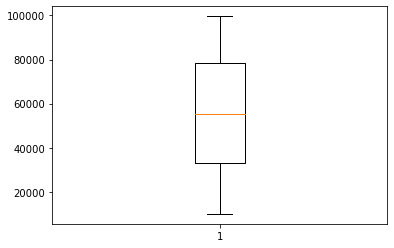

In [11]:
plt.boxplot(data.TaxableIncome)#checking the outliers using the boxplot
plt.show()

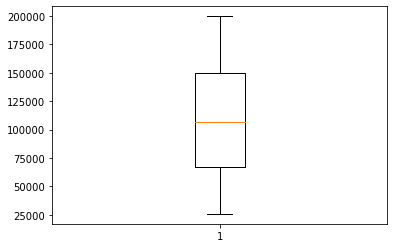

In [15]:
plt.boxplot(data.CityPopulation)
plt.show()

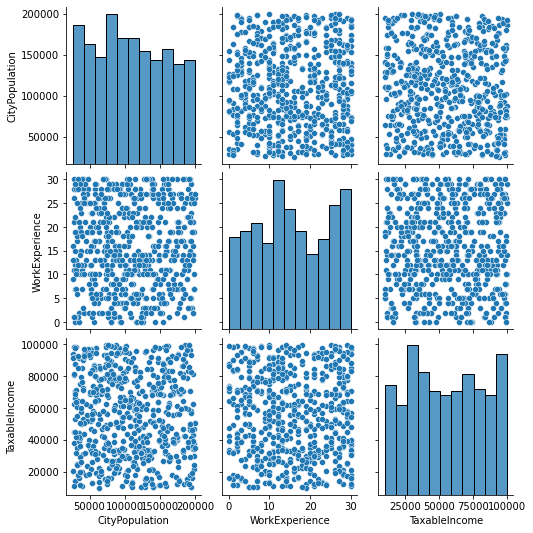

In [16]:
sns.pairplot(data)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

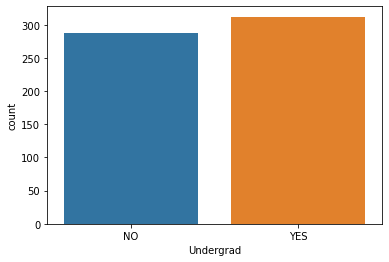

In [17]:
sns.countplot(data.Undergrad)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

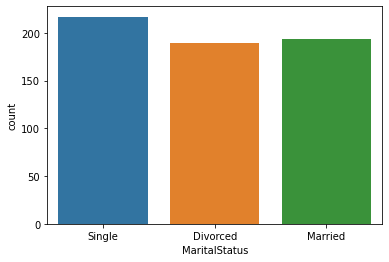

In [18]:
sns.countplot(data.MaritalStatus)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Urban', ylabel='count'>

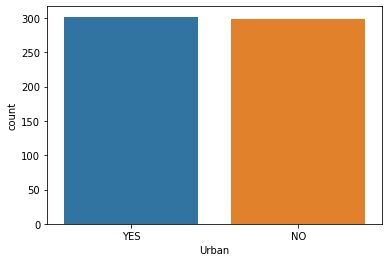

In [19]:
sns.countplot(data.Urban)

0.01852862786533781
-1.1675237113768457


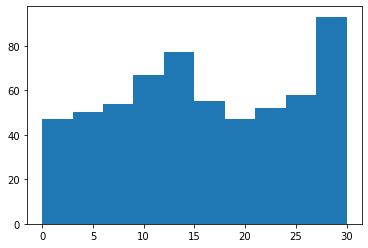

In [22]:
plt.hist(data.WorkExperience)
print(data.WorkExperience.skew())
print(data.WorkExperience.kurt())

0.030014788906377175
-1.1997824607083138


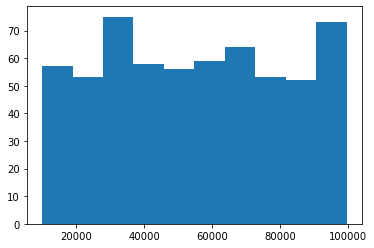

In [24]:
plt.hist(data.TaxableIncome)
print(data.TaxableIncome.skew())
print(data.TaxableIncome.kurt())

In [14]:
x=data.iloc[:,0:5]
x

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [15]:
y=data.iloc[:,-1]
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income, Length: 600, dtype: object

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=7)## here i am dividing the data into the test and train

In [51]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=4)#building the model of the decision tree
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

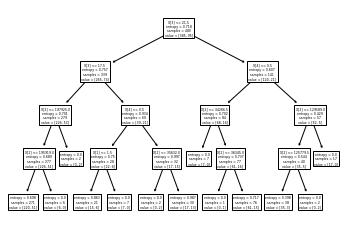

In [52]:
tree.plot_tree(model1);

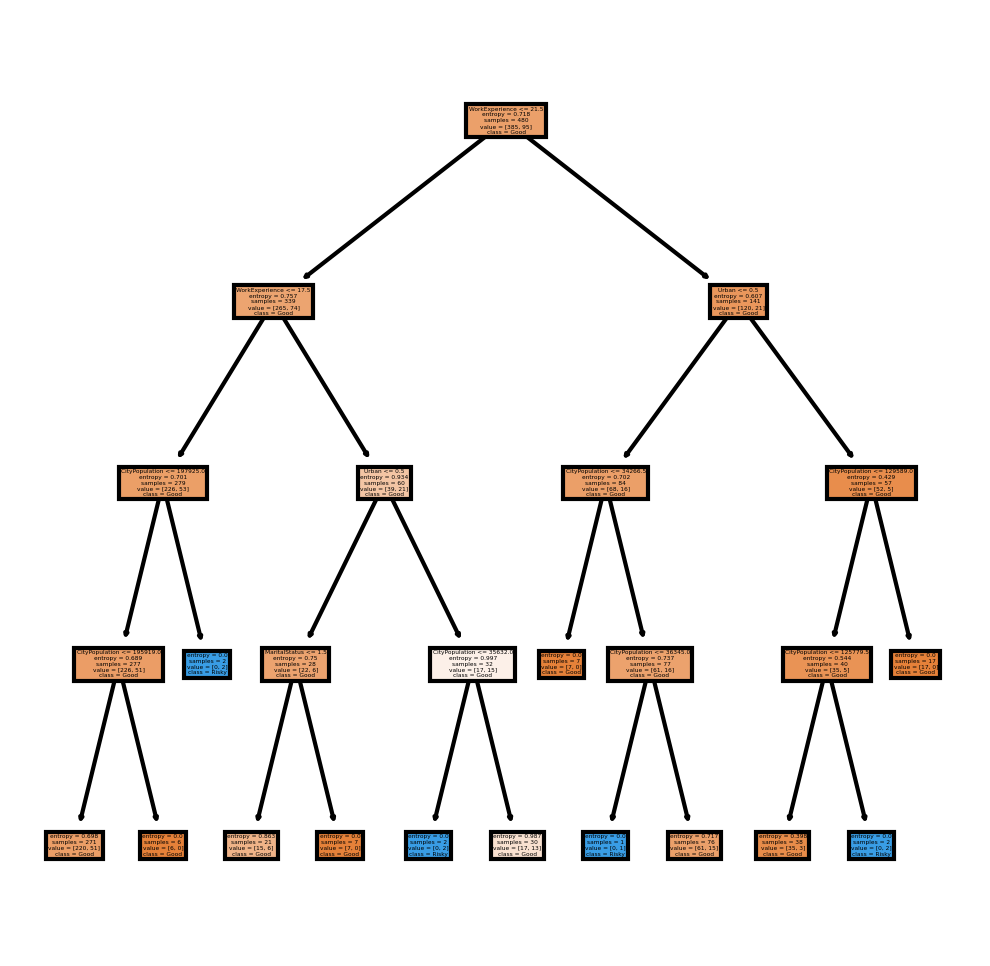

In [53]:
iv=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']
dv=['Good','Risky']
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model1,feature_names=iv,class_names=dv,filled=True)
plt.show()

In [54]:
feature_imp=model1.feature_importances_
feature_imp

array([0.        , 0.07514547, 0.59734293, 0.18821346, 0.13929814])

<AxesSubplot:>

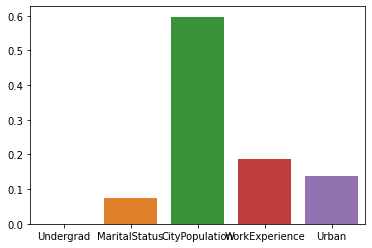

In [55]:
sns.barplot(x=iv,y=feature_imp)

In [56]:
predict=model1.predict(x_test)
pd.crosstab(y_test,predict)

col_0,Good,Risky
Income,,
Good,90,1
Risky,29,0


In [57]:
accuracy=np.mean(y_test==predict)
accuracy

0.75

In [40]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

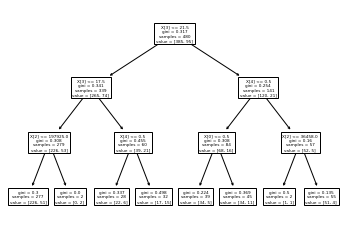

In [42]:
tree.plot_tree(model2)
plt.show()

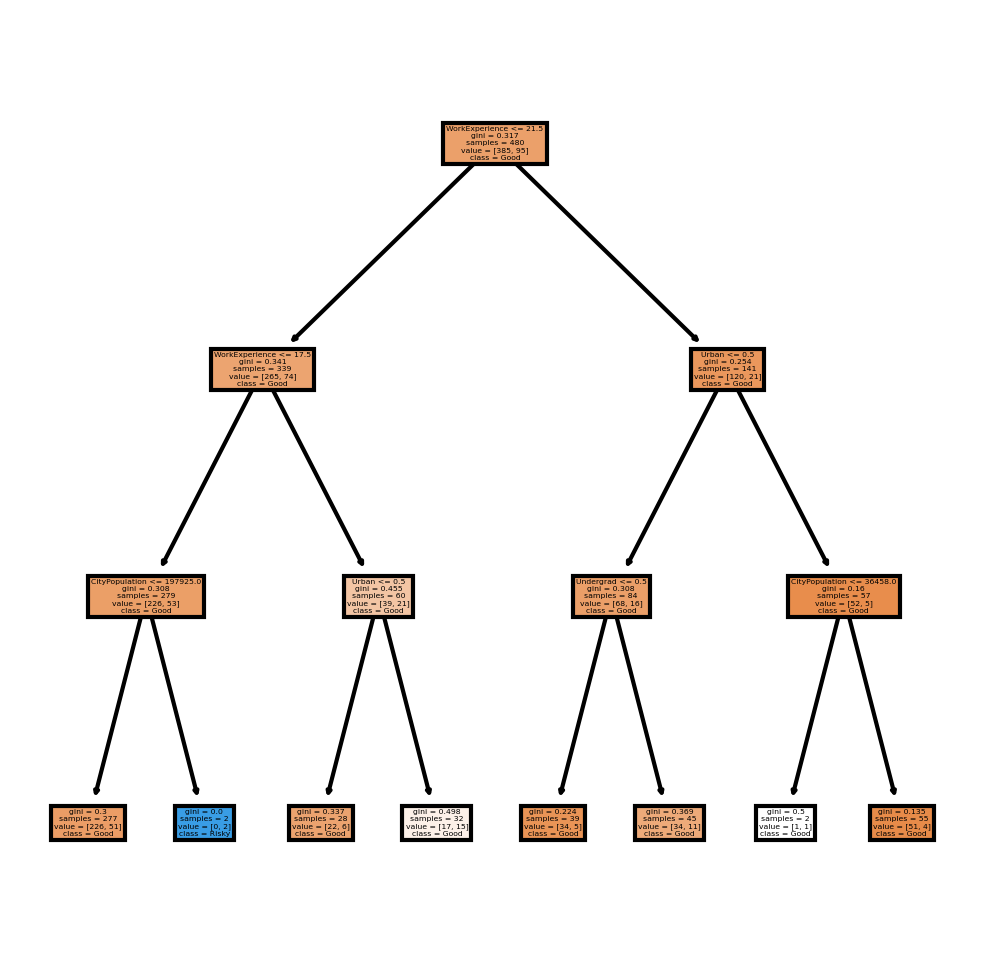

In [43]:
iv=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']
dv=['Good','Risky']
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model2,feature_names=iv,class_names=dv,filled=True)
plt.show()

In [45]:
feature_imp2=model2.feature_importances_
feature_imp2

array([0.05617154, 0.        , 0.33311548, 0.34695915, 0.26375383])

<AxesSubplot:>

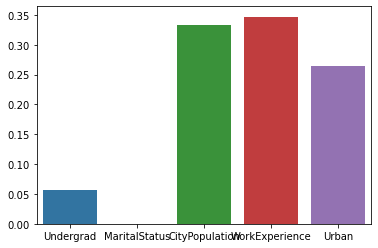

In [47]:
sns.barplot(x=iv,y=feature_imp2)

In [48]:
predict2=model2.predict(x_test)
predict2

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [50]:
accuracy2=np.mean(predict2==y_test)
accuracy2

0.7583333333333333